In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer_acquisition = pd.read_csv('Customer Acqusition.csv')
spend = pd.read_csv('spend.csv')
repayment = pd.read_csv('Repayment.csv')

In [4]:
customer_acquisition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [5]:
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [6]:
repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [7]:
del repayment['Unnamed: 4']

#### 1. Replace age < 18 with the mean age

In [11]:
mean_age = customer_acquisition.loc[customer_acquisition['Age'] >= 18, 'Age'].mean()
customer_acquisition['Age'] = customer_acquisition['Age'].apply(lambda x: mean_age if x < 18 else x)

In [12]:
customer_acquisition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


#### 2. Adjust spend amounts that exceed the limit

In [13]:
spend = spend.merge(customer_acquisition[['Customer', 'Limit']], on='Customer', suffixes=('', '_CustomerAcquisition'))

spend['Adjusted Amount'] = spend.apply(lambda row: row['Amount'] if row['Amount'] <= row['Limit'] else 0.5 * row['Limit'], axis=1)

spend = spend.drop(columns=['Amount'])
spend = spend.rename(columns={'Adjusted Amount': 'Amount'})

In [14]:
spend

,Sl No:,Customer,Month,Type,Limit,Amount
0,1,A1,12-Jan-04,JEWELLERY,500000.0,485470.80
1,2,A1,3-Jan-04,PETRO,500000.0,410556.13
2,3,A1,15-Jan-04,CLOTHES,500000.0,23740.46
3,4,A1,25-Jan-04,FOOD,500000.0,484342.47
4,5,A1,17-Jan-05,CAMERA,500000.0,369694.07
...,...,...,...,...,...,...
1495,277,A7,3-May-06,AIR TICKET,100001.0,50000.50
1496,295,A7,23-Feb-05,CAMERA,100001.0,50000.50
1497,313,A7,12-Jan-04,AUTO,100001.0,50000.50
1498,331,A7,25-Jan-04,TRAIN TICKET,100001.0,50000.50


#### 3. Adjust repayment amounts that exceed the limit

In [15]:
repayment = repayment.merge(customer_acquisition[['Customer', 'Limit']], on='Customer', suffixes=('', '_CustomerAcquisition'))

repayment['Adjusted Amount'] = repayment.apply(lambda row: row['Amount'] if row['Amount'] <= row['Limit'] else row['Limit'], axis=1)

repayment = repayment.drop(columns=['Amount'])
repayment = repayment.rename(columns={'Adjusted Amount': 'Amount'})

In [16]:
repayment

,SL No:,Customer,Month,Limit,Amount
0,NaN,A1,12-Jan-04,500000.0,495414.75
1,2.0,A1,3-Jan-04,500000.0,245899.02
2,3.0,A1,15-Jan-04,500000.0,259490.06
3,4.0,A1,25-Jan-04,500000.0,437555.12
4,5.0,A1,17-Jan-05,500000.0,165972.88
...,...,...,...,...,...
1495,277.0,A7,22-Nov-05,100001.0,55108.71
1496,295.0,A7,3-Dec-05,100001.0,100001.00
1497,313.0,A7,23-Feb-05,100001.0,100001.00
1498,331.0,A7,31-Mar-06,100001.0,100001.00


#### 2 a. Distinct customers

In [17]:
distinct_customers = customer_acquisition['Customer'].nunique()
print(f"Distinct Customers: {distinct_customers}")

Distinct Customers: 100


#### b. Distinct categories

In [18]:
distinct_categories = spend['Type'].nunique()
print(f"Distinct Categories: {distinct_categories}")

Distinct Categories: 15


#### c. Average monthly spend by customers

In [19]:
average_monthly_spend = spend.groupby('Customer')['Amount'].sum().mean()
print(f"Average Monthly Spend by Customers: {average_monthly_spend}")

Average Monthly Spend by Customers: 2197810.8523


#### d. Average monthly repayment by customers

In [20]:
average_monthly_repayment = repayment.groupby('Customer')['Amount'].sum().mean()
print(f"Average Monthly Repayment by Customers: {average_monthly_repayment}")

Average Monthly Repayment by Customers: 2449823.6009


#### e. Profit for the bank for each month with a monthly interest rate of 2.9%

In [21]:
monthly_profit = repayment.groupby('Customer')['Amount'].sum() - spend.groupby('Customer')['Amount'].sum()
positive_monthly_profit = monthly_profit[monthly_profit > 0]
monthly_interest = positive_monthly_profit * 0.029
total_monthly_interest = monthly_interest.sum()
print(f"Total Monthly Interest Profit: {total_monthly_interest}")

Total Monthly Interest Profit: 1086266.4615099998


#### f.top 5 product types

In [22]:
top_5_product_types = spend['Type'].value_counts().head(5)
print("Top 5 Product Types:")
print(top_5_product_types)

Top 5 Product Types:
Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64


#### g. City having maximum spend

In [23]:
spend = spend.merge(customer_acquisition[['Customer', 'City']], on='Customer', how='left')

city_max_spend = spend.groupby('City')['Amount'].sum().idxmax()
print(f"City with Maximum Spend: {city_max_spend}")

City with Maximum Spend: COCHIN


In [24]:
import warnings
warnings.filterwarnings("ignore")

#### h. Age group spending more money

In [25]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+']
customer_acquisition['Age'] = pd.cut(customer_acquisition['Age'], bins=bins, labels=labels, right=False)

# Merge spend data with customer acquisition data to get the age group for each customer
spend = spend.merge(customer_acquisition[['Customer', 'Age']], on='Customer', how='left')

# Calculate the age group spending more money
age_group_max_spend = spend.groupby('Age')['Amount'].sum().idxmax()
print(f"Age Group Spending More Money: {age_group_max_spend}")


Age Group Spending More Money: 45-55


#### i. Top 10 customers in terms of repayment

In [26]:
top_10_customers_repayment = repayment.groupby('Customer')['Amount'].sum().nlargest(10)
print("Top 10 Customers in Terms of Repayment:")
print(top_10_customers_repayment)

Top 10 Customers in Terms of Repayment:
Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64


#### 3. City wise spend on each product on yearly basis

           City          Type  Year      Amount
0     BANGALORE    AIR TICKET  2004   749981.04
1     BANGALORE    AIR TICKET  2005  1972296.92
2     BANGALORE    AIR TICKET  2006  1311522.46
3     BANGALORE          AUTO  2005   141539.79
4     BANGALORE          AUTO  2006   822785.32
..          ...           ...   ...         ...
316  TRIVANDRUM      SHOPPING  2005   428833.42
317  TRIVANDRUM      SHOPPING  2006   100001.00
318  TRIVANDRUM  TRAIN TICKET  2004   177612.22
319  TRIVANDRUM  TRAIN TICKET  2005   276962.03
320  TRIVANDRUM  TRAIN TICKET  2006   262422.86

[321 rows x 4 columns]


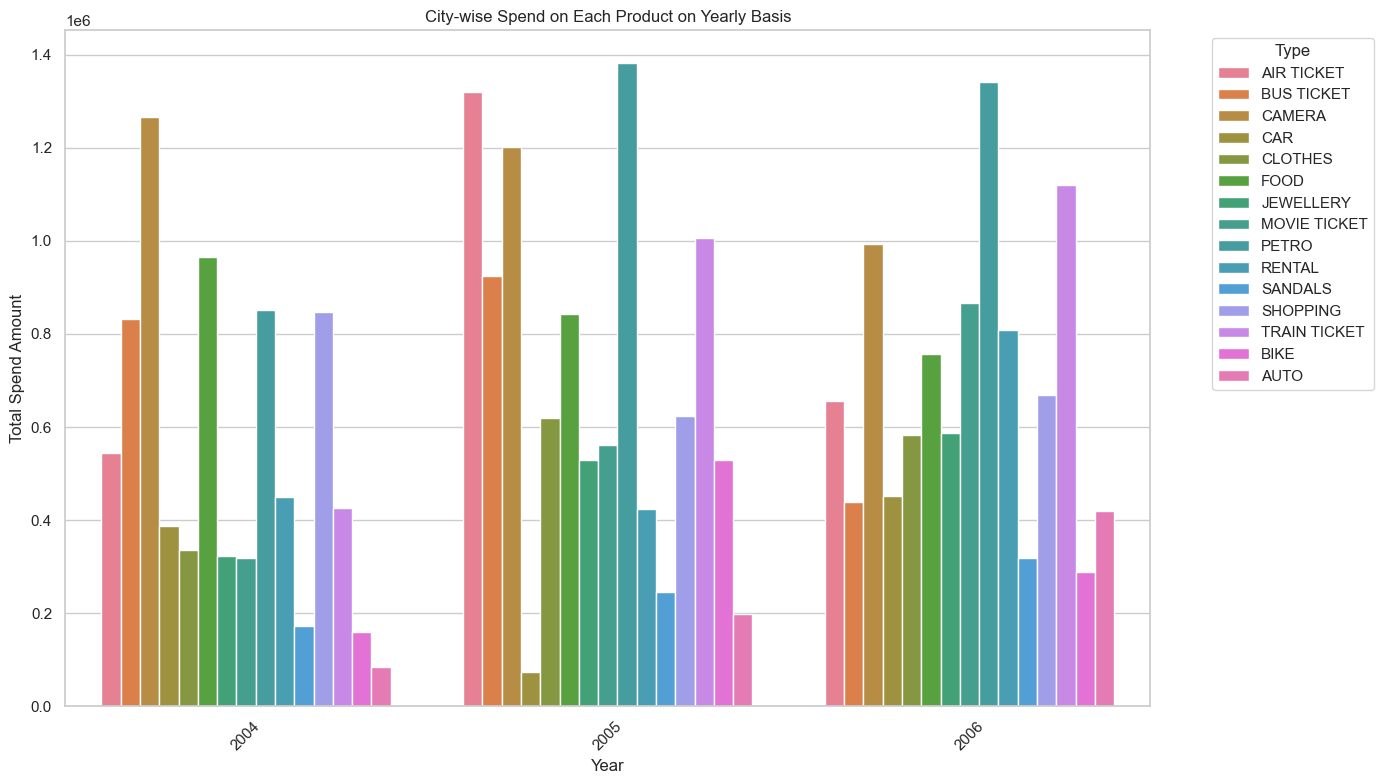

In [27]:
# Convert the 'Month' column in the spend dataset to datetime format to extract the year
spend['Month'] = pd.to_datetime(spend['Month'], format='%d-%b-%y')
spend['Year'] = spend['Month'].dt.year

# Aggregate the spend data by city, product type, and year
city_product_yearly_spend = spend.groupby(['City', 'Type', 'Year'])['Amount'].sum().reset_index()

print(city_product_yearly_spend)

# Plot the data using seaborn
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.barplot(x='Year', y='Amount', hue='Type', data=city_product_yearly_spend, ci=None)
plt.title('City-wise Spend on Each Product on Yearly Basis')
plt.xlabel('Year')
plt.ylabel('Total Spend Amount')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


#### 4 a. Monthly comparison of total spends, city wise

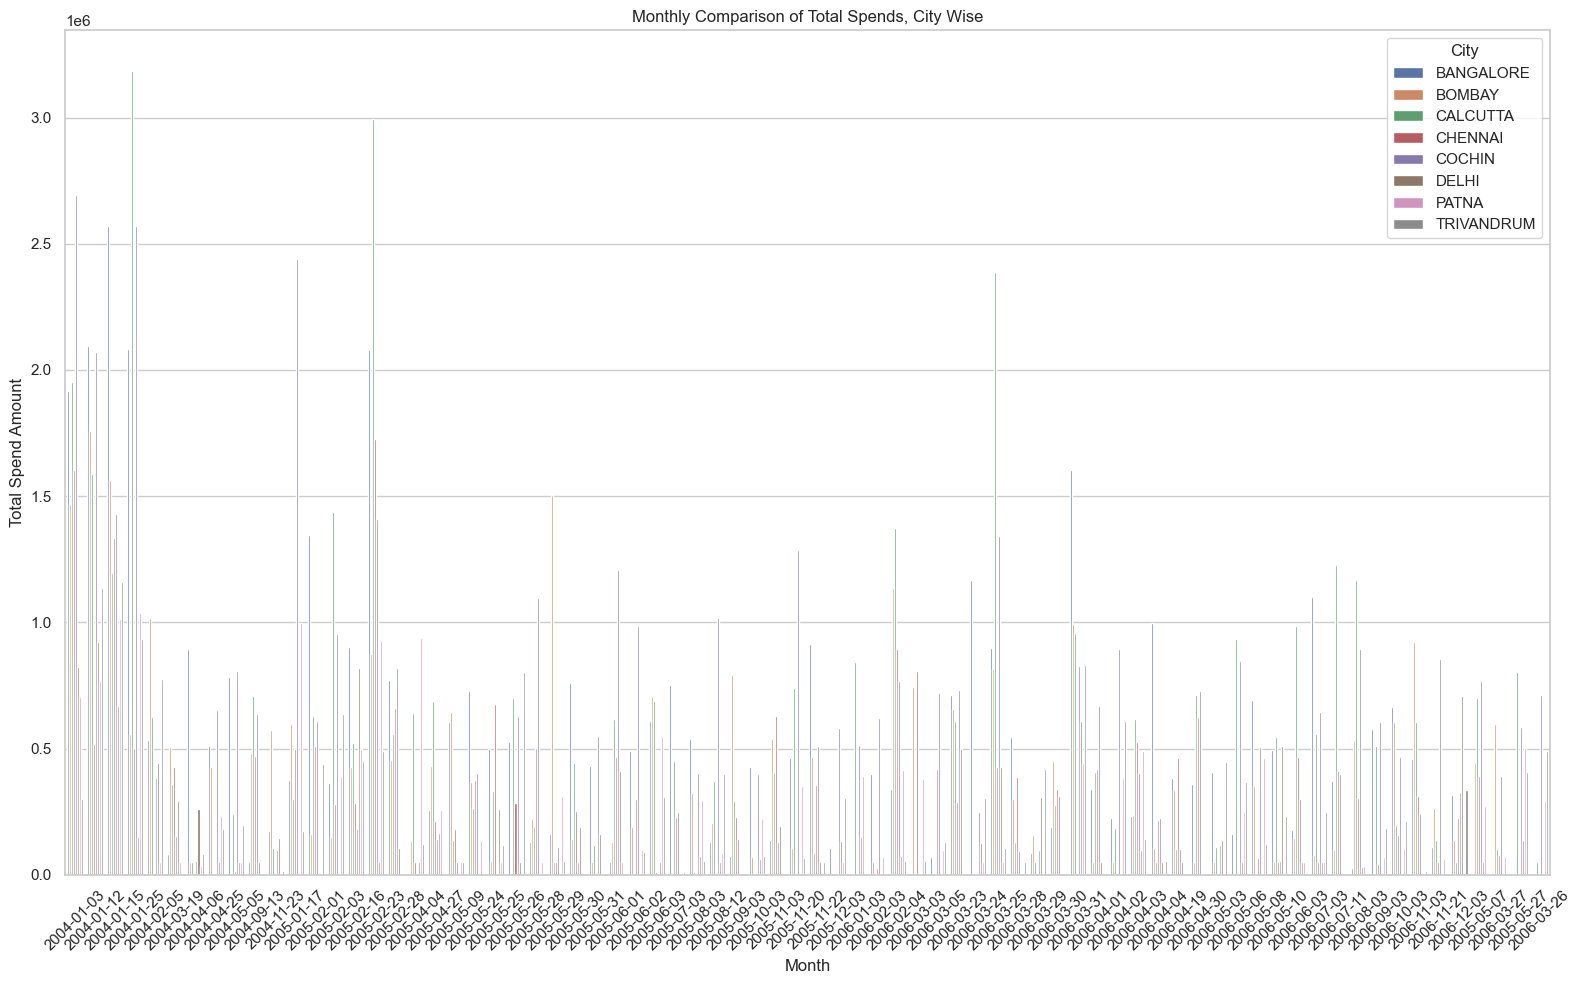

In [28]:
# Group spend data by city and year-month, summing the spend amount
city_monthly_spend = spend.groupby(['City', 'Month'])['Amount'].sum().reset_index()

# Plot the data using seaborn
plt.figure(figsize=(16, 10))
sns.barplot(x='Month', y='Amount', hue='City', data=city_monthly_spend)
plt.title('Monthly Comparison of Total Spends, City Wise')
plt.xlabel('Month')
plt.ylabel('Total Spend Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### b. Comparison of yearly spend on air tickets

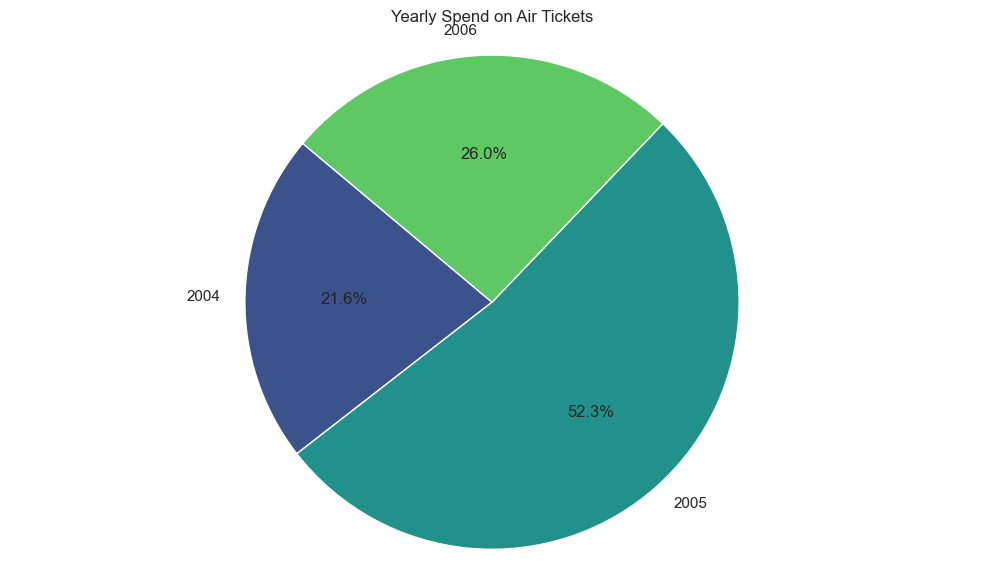

In [29]:
air_tickets_spend = spend[spend['Type'] == 'AIR TICKET']

yearly_air_tickets_spend = air_tickets_spend.groupby('Year')['Amount'].sum().reset_index()

# Plot the data using a pie chart
plt.figure(figsize=(10, 6))
plt.pie(yearly_air_tickets_spend['Amount'], labels=yearly_air_tickets_spend['Year'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(yearly_air_tickets_spend)))
plt.title('Yearly Spend on Air Tickets')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.tight_layout()
plt.show()


#### c. Comparison of monthly spend for each product

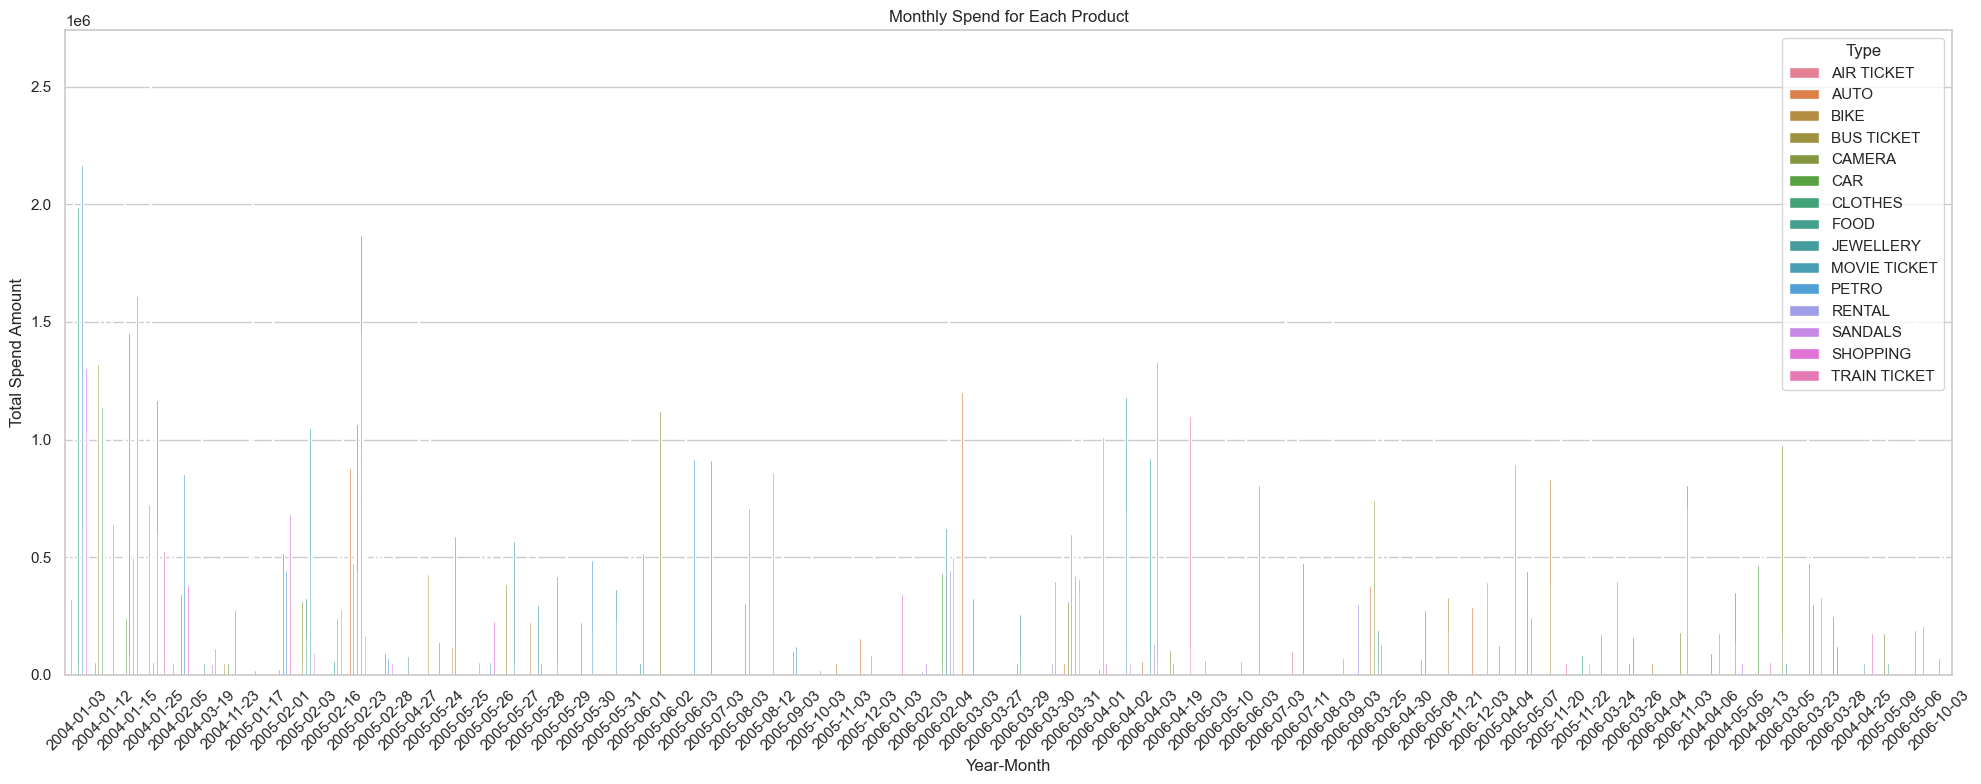

In [30]:
# Group spend data by product type and year-month, summing the spend amount
product_monthly_spend = spend.groupby(['Type', 'Month'])['Amount'].sum().reset_index()

# Plot the data using seaborn
plt.figure(figsize=(20, 8))
sns.barplot(x='Month', y='Amount', hue='Type', data=product_monthly_spend)
plt.title('Monthly Spend for Each Product')
plt.xlabel('Year-Month')
plt.ylabel('Total Spend Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
merged_data = repayment.merge(customer_acquisition[['Customer', 'City', 'Product']], on='Customer', how='left')

def top_customers_by_repayment(merged_data, product_type, time_period):

    filtered_data = merged_data[merged_data['Product'] == product_type]

    filtered_data['Month'] = pd.to_datetime(filtered_data['Month'], format='%d-%b-%y')
    filtered_data['Year'] = filtered_data['Month'].dt.year
    filtered_data['Month'] = filtered_data['Month'].dt.to_period('M')

    if time_period == 'yearly':
        grouped_data = filtered_data.groupby(['Customer', 'City', 'Year'])['Amount'].sum().reset_index()
    elif time_period == 'monthly':
        grouped_data = filtered_data.groupby(['Customer', 'City', 'Month'])['Amount'].sum().reset_index()
    else:
        raise ValueError("Invalid time period. Choose 'yearly' or 'monthly'.")

    grouped_data = grouped_data.sort_values(by=['City', 'Amount'], ascending=[True, False])

    top_customers = grouped_data.groupby('City').head(10)

    return top_customers

product_type = 'Gold' 
time_period = 'yearly'  
top_customers = top_customers_by_repayment(merged_data, product_type, time_period)

print(top_customers)


   Customer        City  Year      Amount
52      A43   BANGALORE  2005  4006956.60
13      A13   BANGALORE  2005  3757673.00
14      A13   BANGALORE  2006  3477314.89
15      A14   BANGALORE  2004  2770261.30
17      A14   BANGALORE  2006  2681025.72
40      A30   BANGALORE  2005  2667746.38
53      A43   BANGALORE  2006  2576417.39
16      A14   BANGALORE  2005  2491981.61
41      A30   BANGALORE  2006  2486958.41
0        A1   BANGALORE  2004  2359797.84
26      A17      BOMBAY  2006  3127783.14
49      A42      BOMBAY  2005  3125758.43
11      A12      BOMBAY  2006  3118090.96
48      A42      BOMBAY  2004  3045914.71
10      A12      BOMBAY  2005  2877588.30
9       A12      BOMBAY  2004  2339080.90
66      A62      BOMBAY  2004  1744114.25
68      A62      BOMBAY  2006  1684085.69
67      A62      BOMBAY  2005  1541617.21
50      A42      BOMBAY  2006  1443787.72
61      A60    CALCUTTA  2005  3742856.10
38      A29    CALCUTTA  2006  3434298.00
62      A60    CALCUTTA  2006  324